In [5]:
import numpy as np  # Mengimpor modul NumPy untuk komputasi numerik
import pandas as pd  # Mengimpor modul Pandas untuk manipulasi dan analisis data

data_mahasiswa = pd.read_csv("dataMahasiswa.csv")  # Membaca file CSV dan menyimpannya ke dalam DataFrame
data_mahasiswa  # Menampilkan DataFrame data_mahasiswa


,mhs,ipk,gajo
0,A,3.00,10
1,B,2.99,1


In [22]:
# Mengonversi DataFrame data_mahasiswa menjadi array NumPy untuk pengolahan lebih lanjut
data_ipk = np.array(data_mahasiswa)

# Menghitung total IPK untuk mahasiswa A
ipk_A = np.sum(data_ipk[0:1,1], axis=0)

# Menghitung total IPK untuk mahasiswa B
ipk_B = np.sum(data_ipk[1:2,1], axis=0)

# Mencetak hasil perhitungan IPK untuk masing-masing mahasiswa
print("IPK Mahasiswa A : ", ipk_A)
print("IPK Mahasiswa B : ", ipk_B)


IPK Mahasiswa A :  3.0
IPK Mahasiswa B :  2.99


In [23]:
# Mengonversi DataFrame data_mahasiswa menjadi array NumPy untuk pengolahan lebih lanjut
data_gaji = np.array(data_mahasiswa)

# Menghitung total gaji untuk mahasiswa A
gaji_A = np.sum(data_gaji[0:1,2], axis=0)

# Menghitung total gaji untuk mahasiswa B
gaji_B = np.sum(data_gaji[1:2,2], axis=0)

# Mencetak hasil perhitungan gaji untuk masing-masing mahasiswa
print("Gaji Mahasiswa A : ", gaji_A)
print("Gaji Mahasiswa B : ", gaji_B)


Gaji Mahasiswa A :  10
Gaji Mahasiswa B :  1


In [8]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=637dff9f82385b651f24d0e5269c3bdeaadfe921b12a7f8b8e41bcaa7133ec00
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


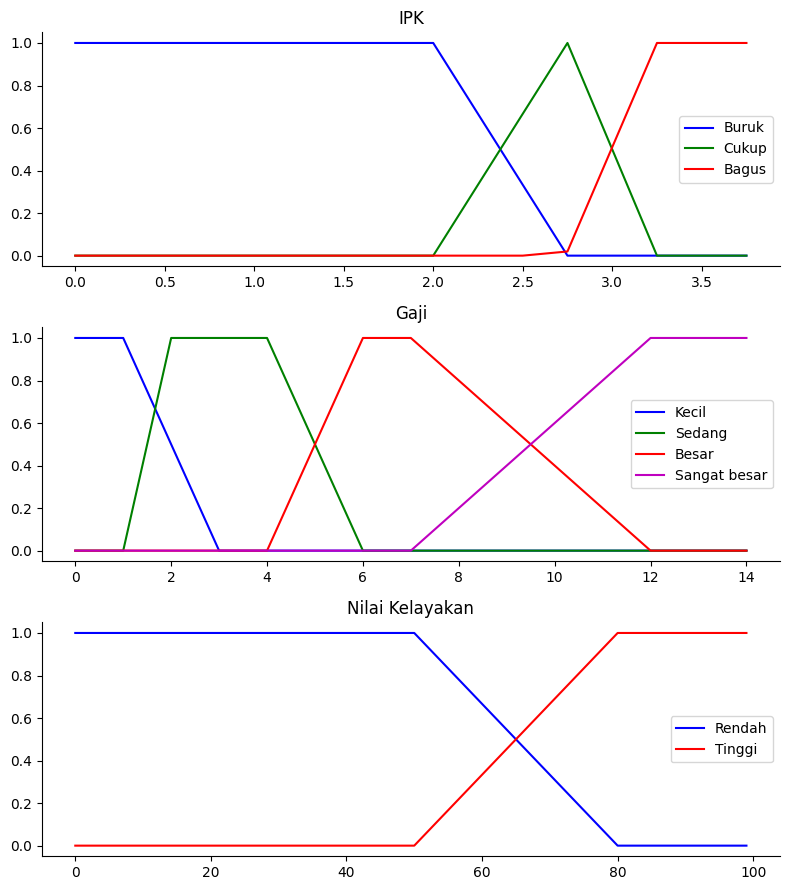

In [24]:
import skfuzzy as fuzz  # Mengimpor modul scikit-fuzzy sebagai fuzz
import matplotlib.pyplot as plt  # Mengimpor modul matplotlib.pyplot sebagai plt
import numpy as np  # Mengimpor modul NumPy sebagai np

# Semesta Pembicaraan
# Baris ini mendefinisikan rentang nilai untuk variabel IPK, gaji, dan nilai kelayakan.
x_ipk = np.arange(0, 4, 0.25)
x_gaji = np.arange(0, 15, 1)
x_nk = np.arange(0, 100, 1)

# Membership Function
#mendefinisikan fungsi keanggotaan untuk variabel IPK, Gaji dan Nilai Kelayakan. Fungsi-fungsi keanggotaan
#tersebut didefinisikan dengan menggunakan fungsi-fungsi yang disediakan oleh modul skfuzzy

# ipk

ipk_buruk = fuzz.trapmf(x_ipk, [0, 0, 2, 2.75])
ipk_cukup = fuzz.trimf(x_ipk, [2, 2.75, 3.25])
ipk_bagus = fuzz.trapmf(x_ipk, [2.74, 3.25, 4, 4])

# Gaji
gaji_kecil = fuzz.trapmf(x_gaji, [0, 0, 1, 3])
gaji_sedang = fuzz.trapmf(x_gaji, [1, 2, 4, 6])
gaji_besar = fuzz.trapmf(x_gaji, [4, 6, 7, 12])
gaji_sangat_besar = fuzz.trapmf(x_gaji, [7, 12, 15, 15])

# Nilai kelayakan
nk_rendah = fuzz.trapmf(x_nk, [0, 0, 50, 80])
nk_tinggi = fuzz.trapmf(x_nk, [50, 80, 100, 100])


# kurva membership function || Baris ini membuat subplot untuk menampilkan
#kurva keanggotaan variabel IPK, gaji, dan nilai kelayakan
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))

#Kurva IPK
ax0.plot(x_ipk, ipk_buruk, 'b', linewidth=1.5, label='Buruk')
ax0.plot(x_ipk, ipk_cukup, 'g', linewidth=1.5, label='Cukup')
ax0.plot(x_ipk, ipk_bagus, 'r', linewidth=1.5, label='Bagus')
ax0.set_title('IPK')
ax0.legend()

#Kurva Gaji
ax1.plot(x_gaji, gaji_kecil, 'b', linewidth=1.5, label='Kecil')
ax1.plot(x_gaji, gaji_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_gaji, gaji_besar, 'r', linewidth=1.5, label='Besar')
ax1.plot(x_gaji, gaji_sangat_besar, 'm', linewidth=1.5, label='Sangat besar')
ax1.set_title('Gaji')
ax1.legend()

#Kurva Nilai Kelayakan
ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_nk, nk_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

#Bagian ini menghilangkan garis tepi atas dan kanan pada subplot
# serta menyesuaikan layout plot agar terlihat lebih rapi.
for ax in (ax0, ax1, ax2) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [25]:
# Mendefinisikan fungsi keanggotaan IPK
def fungsiKeanggotaan_IPK(_nilai):
    buruk = fuzz.interp_membership(x_ipk, ipk_buruk, _nilai)  # Menghitung derajat keanggotaan IPK buruk
    cukup = fuzz.interp_membership(x_ipk, ipk_cukup, _nilai)  # Menghitung derajat keanggotaan IPK cukup
    bagus = fuzz.interp_membership(x_ipk, ipk_bagus, _nilai)  # Menghitung derajat keanggotaan IPK bagus

    return buruk, cukup, bagus

# Mendefinisikan fungsi keanggotaan Gaji
def fungsiKeanggotaan_Gaji(_nilai):
    kecil = fuzz.interp_membership(x_gaji, gaji_kecil, _nilai)  # Menghitung derajat keanggotaan gaji kecil
    sedang = fuzz.interp_membership(x_gaji, gaji_sedang, _nilai)  # Menghitung derajat keanggotaan gaji sedang
    besar = fuzz.interp_membership(x_gaji, gaji_besar, _nilai)  # Menghitung derajat keanggotaan gaji besar
    sangat_besar = fuzz.interp_membership(x_gaji, gaji_sangat_besar, _nilai)  # Menghitung derajat keanggotaan gaji sangat besar

    return kecil, sedang, besar, sangat_besar

# Menghitung derajat keanggotaan IPK untuk mahasiswa A dan B
ipk_mhsA = fungsiKeanggotaan_IPK(ipk_A)
ipk_mhsB = fungsiKeanggotaan_IPK(ipk_B)

# Menampilkan derajat keanggotaan IPK untuk mahasiswa A dan B
print("Derajat keanggotaan IPK pada mahasiswa A: ", ipk_mhsA)
print("Derajat keanggotaan IPK pada mahasiswa B: ", ipk_mhsB)


Derajat keanggotaan IPK pada mahasiswa A:  (0.0, 0.5, 0.5098039215686272)
Derajat keanggotaan IPK pada mahasiswa B:  (0.0, 0.5199999999999996, 0.4901960784313727)


In [12]:
# Menghitung derajat keanggotaan gaji untuk mahasiswa A dan B
gaji_mhsA = fungsiKeanggotaan_Gaji(gaji_A)  # Menghitung derajat keanggotaan gaji mahasiswa A
gaji_mhsB = fungsiKeanggotaan_Gaji(gaji_B)  # Menghitung derajat keanggotaan gaji mahasiswa B

# Menampilkan derajat keanggotaan gaji untuk mahasiswa A dan B
print("Gaji Mahasiswa A: ", gaji_mhsA)
print("Gaji Mahasiswa B: ", gaji_mhsB)


Gaji Mahasiswa A:  (0.0, 0.0, 0.4, 0.6)
Gaji Mahasiswa B:  (1.0, 0.0, 0.0, 0.0)


In [26]:
# Aturan ke-7: Jika IPK cukup DAN Gaji besar, maka nilai kelayakan rendah
nk_7 = np.fmin(ipk_mhsA[1], gaji_mhsA[2])

# Aturan ke-8: Jika IPK cukup DAN Gaji sangat besar, maka nilai kelayakan rendah
nk_8 = np.fmin(ipk_mhsA[1], gaji_mhsA[3])

# Aturan ke-11: Jika IPK bagus DAN Gaji besar, maka nilai kelayakan tinggi
nk_11 = np.fmin(ipk_mhsA[2], gaji_mhsA[2])

# Aturan ke-12: Jika IPK bagus DAN Gaji sangat besar, maka nilai kelayakan rendah
nk_12 = np.fmin(ipk_mhsA[2], gaji_mhsA[3])

# Menggabungkan nilai kelayakan rendah dari aturan 7, 8, dan 12
mhsA_nk_rendah = np.fmax(nk_7, np.fmax(nk_8, nk_12))
mhsA_nk_tinggi = nk_11

print("Nilai kelayakan mahasiswa A")
print("Nilai kelayakan rendah: ", mhsA_nk_rendah)
print("Nilai kelayakan tinggi: ", mhsA_nk_tinggi)


Nilai kelayakan mahasiswa A
Nilai kelayakan rendah:  0.5098039215686272
Nilai kelayakan tinggi:  0.4


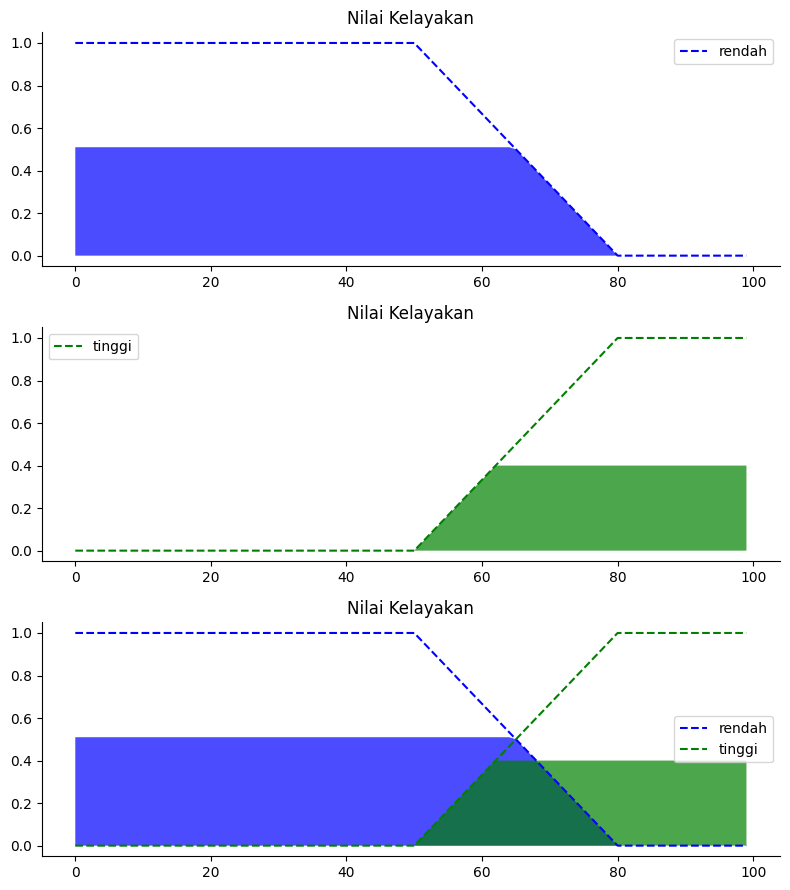

In [15]:
# Menyesuaikan nilai kelayakan mahasiswa A dengan nilai rendah dan tinggi
mhsA_nk_rendah = np.fmin(mhsA_nk_rendah, nk_rendah)  # Menyesuaikan nilai kelayakan rendah dengan nilai rendah yang telah ditentukan
mhsA_nk_tinggi = np.fmin(mhsA_nk_tinggi, nk_tinggi)  # Menyesuaikan nilai kelayakan tinggi dengan nilai tinggi yang telah ditentukan

# Inisialisasi titik awal untuk garis arsiran
nk0 = np.zeros_like(x_nk)  # Inisialisasi array nol untuk garis arsiran
nkr = np.zeros_like(nk_rendah)  # Inisialisasi array nol untuk garis arsiran nilai kelayakan rendah
nkt = np.zeros_like(nk_tinggi)  # Inisialisasi array nol untuk garis arsiran nilai kelayakan tinggi

# Visualisasi grafik
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))  # Membuat subplot untuk menampilkan tiga grafik

# Menampilkan area di bawah kurva nilai kelayakan rendah mahasiswa A
ax0.fill_between(x_nk, nkr, mhsA_nk_rendah, facecolor='b', alpha=0.7)  # Menampilkan area di bawah kurva nilai kelayakan rendah dengan warna biru
ax0.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='rendah')  # Menampilkan kurva nilai kelayakan rendah dengan garis putus-putus biru
ax0.set_title('Nilai Kelayakan')  # Memberi judul subplot
ax0.legend()  # Menampilkan legenda

# Menampilkan area di bawah kurva nilai kelayakan tinggi mahasiswa A
ax1.fill_between(x_nk, nkt, mhsA_nk_tinggi, facecolor='g', alpha=0.7)  # Menampilkan area di bawah kurva nilai kelayakan tinggi dengan warna hijau
ax1.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='tinggi')  # Menampilkan kurva nilai kelayakan tinggi dengan garis putus-putus hijau
ax1.set_title('Nilai Kelayakan')  # Memberi judul subplot
ax1.legend()  # Menampilkan legenda

# Menampilkan area di bawah kurva nilai kelayakan rendah dan tinggi mahasiswa A
ax2.fill_between(x_nk, nk0, mhsA_nk_rendah, facecolor='b', alpha=0.7)  # Menampilkan area di bawah kurva nilai kelayakan rendah dengan warna biru
ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='rendah')  # Menampilkan kurva nilai kelayakan rendah dengan garis putus-putus biru
ax2.fill_between(x_nk, nk0, mhsA_nk_tinggi, facecolor='g', alpha=0.7)  # Menampilkan area di bawah kurva nilai kelayakan tinggi dengan warna hijau
ax2.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='tinggi')  # Menampilkan kurva nilai kelayakan tinggi dengan garis putus-putus hijau
ax2.set_title('Nilai Kelayakan')  # Memberi judul subplot
ax2.legend()  # Menampilkan legenda

# Menonaktifkan garis tepi atas dan kanan pada grafik
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)  # Menghilangkan garis tepi atas
    ax.spines['right'].set_visible(False)  # Menghilangkan garis tepi kanan
    ax.get_xaxis().tick_bottom()  # Menampilkan label sumbu x di bawah
    ax.get_yaxis().tick_left()  # Menampilkan label sumbu y di kiri

plt.tight_layout()  # Menyesuaikan layout plot agar terlihat rapi


In [16]:
# Mengimpor library numpy sebagai np
import numpy as np

# rule 5.IF IPK = Cukup dan Gaji = Kecil THEN NK = Tinggi
nk_5 = np.fmin(ipk_mhsB[1], gaji_mhsB[0])

# rule 6.IF IPK = Cukup dan Gaji = Sedang THEN NK = Rendah
nk_6 = np.fmin(ipk_mhsB[1], gaji_mhsB[1])

# rule 9.IF IPK = Bagus dan Gaji = Kecil THEN NK = Tinggi
nk_9 = np.fmin(ipk_mhsB[2], gaji_mhsB[0])

# rule 10.IF IPK = Bagus dan Gaji = Sedang THEN NK = Tinggi
nk_10 = np.fmin(ipk_mhsB[2], gaji_mhsB[1])

# Menghitung nilai kelayakan tinggi mahasiswa B
mhsB_nk_tinggi = np.fmax(nk_5, np.fmax(nk_9, nk_10))
mhsB_nk_rendah = nk_6

# Menampilkan nilai kelayakan mahasiswa B
print("nilai kelayakan mahasiswa B")
print("nilai rendah: ", mhsB_nk_rendah)
print("nilai tinggi: ", mhsB_nk_tinggi)

nilai kelayakan mahasiswa B
nilai rendah:  0.0
nilai tinggi:  0.5199999999999996


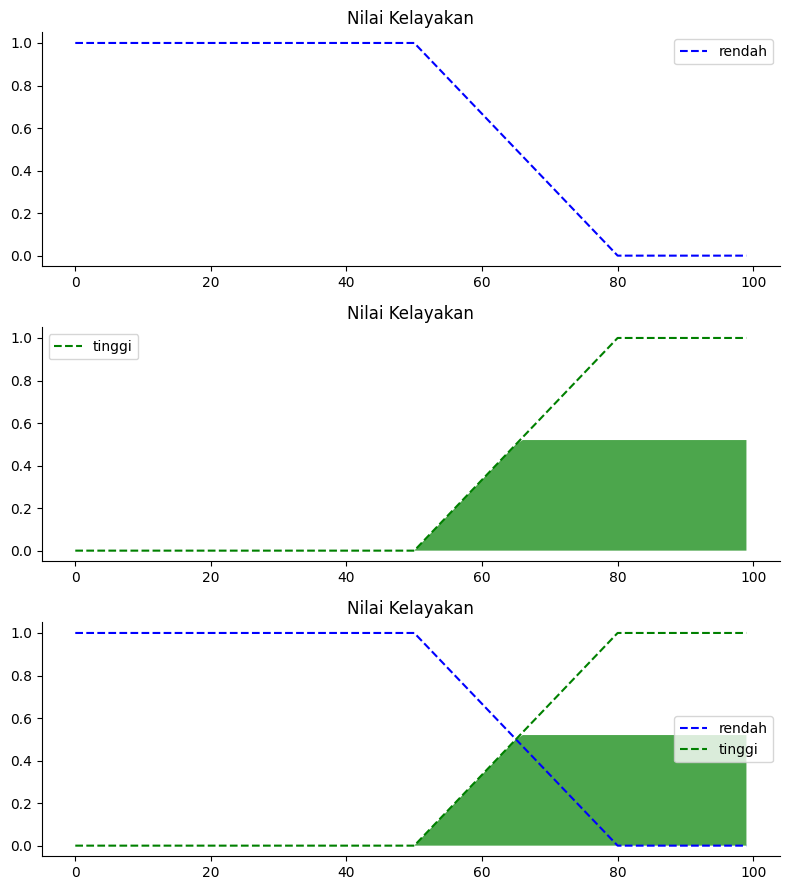

In [17]:
# Untuk plot Arsir, gunakan np.fmin
mhsB_nk_rendah = np.fmin(mhsB_nk_rendah, nk_rendah)  # Menyesuaikan nilai kelayakan rendah mahasiswa B dengan nilai rendah yang sudah ada

# Menyesuaikan nilai kelayakan tinggi mahasiswa B dengan nilai kelayakan tinggi yang sudah ada
mhsB_nk_tinggi = np.fmin(mhsB_nk_tinggi, nk_tinggi)

# Inisialisasi titik awal arsir
nk0 = np.zeros_like(x_nk)  # Inisialisasi array nol untuk garis arsiran
nkr = np.zeros_like(nk_rendah)  # Inisialisasi array nol untuk garis arsiran nilai kelayakan rendah
nkt = np.zeros_like(nk_tinggi)  # Inisialisasi array nol untuk garis arsiran nilai kelayakan tinggi

# Visualisasikan
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))  # Membuat subplot untuk menampilkan tiga grafik

# Menampilkan area di bawah kurva nilai kelayakan rendah mahasiswa B
ax0.fill_between(x_nk, nkr, mhsB_nk_rendah, facecolor='b', alpha=0.7)  # Menampilkan area di bawah kurva nilai kelayakan rendah dengan warna biru
ax0.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='rendah')  # Menampilkan kurva nilai kelayakan rendah dengan garis putus-putus biru
ax0.set_title('Nilai Kelayakan')  # Memberi judul subplot
ax0.legend()  # Menampilkan legenda

# Menampilkan area di bawah kurva nilai kelayakan tinggi mahasiswa B
ax1.fill_between(x_nk, nkt, mhsB_nk_tinggi, facecolor='g', alpha=0.7)  # Menampilkan area di bawah kurva nilai kelayakan tinggi dengan warna hijau
ax1.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='tinggi')  # Menampilkan kurva nilai kelayakan tinggi dengan garis putus-putus hijau
ax1.set_title('Nilai Kelayakan')  # Memberi judul subplot
ax1.legend()  # Menampilkan legenda

# Menampilkan area di bawah kurva nilai kelayakan rendah dan tinggi mahasiswa B
ax2.fill_between(x_nk, nk0, mhsB_nk_rendah, facecolor='b', alpha=0.7)  # Menampilkan area di bawah kurva nilai kelayakan rendah dengan warna biru
ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='rendah')  # Menampilkan kurva nilai kelayakan rendah dengan garis putus-putus biru
ax2.fill_between(x_nk, nk0, mhsB_nk_tinggi, facecolor='g', alpha=0.7)  # Menampilkan area di bawah kurva nilai kelayakan tinggi dengan warna hijau
ax2.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='tinggi')  # Menampilkan kurva nilai kelayakan tinggi dengan garis putus-putus hijau
ax2.set_title('Nilai Kelayakan')  # Memberi judul subplot
ax2.legend()  # Menampilkan legenda

# Menonaktifkan garis tepi atas dan kanan pada grafik
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)  # Menghilangkan garis tepi atas
    ax.spines['right'].set_visible(False)  # Menghilangkan garis tepi kanan
    ax.get_xaxis().tick_bottom()  # Menampilkan label sumbu x di bawah
    ax.get_yaxis().tick_left()  # Menampilkan label sumbu y di kiri

plt.tight_layout()  # Menyesuaikan layout plot agar terlihat rapi


In [18]:
# Komposisi Aturan: Menggabungkan nilai kelayakan rendah dan tinggi mahasiswa A
komposisi = np.fmax(mhsA_nk_rendah, mhsA_nk_tinggi)

# Melakukan defuzzifikasi untuk mendapatkan nilai kelayakan akhir
nk = fuzz.defuzz(x_nk, komposisi, 'centroid')  # Menggunakan metode centroid untuk defuzzifikasi
print("Nilai Kelayakan Mahasiswa A : ", nk)  # Mencetak nilai kelayakan mahasiswa A

# Menghitung nilai Fuzzy untuk fungsi keanggotaan
nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)  # Menghitung nilai Fuzzy untuk fungsi keanggotaan dengan nilai kelayakan hasil defuzzifikasi
nk_defuzzy


Nilai Kelayakan Mahasiswa A :  46.96316743343101


0.5098039215686272

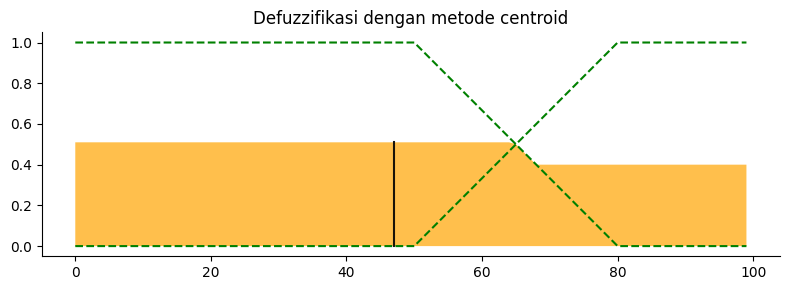

In [19]:
# Visualisasi Hasil Defuzzifikasi dengan metode centroid
fig, ax0 = plt.subplots(figsize=(8, 3))  # Membuat plot dengan ukuran yang ditentukan

# Menampilkan kurva nilai kelayakan rendah dan tinggi
ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle='--', label='Rendah')  # Menampilkan kurva nilai kelayakan rendah dengan garis putus-putus hijau
ax0.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')  # Menampilkan kurva nilai kelayakan tinggi dengan garis putus-putus hijau

# Menampilkan area di bawah kurva hasil komposisi aturan
ax0.fill_between(x_nk, nk0, komposisi, facecolor='Orange', alpha=0.7)  # Menampilkan area di bawah kurva hasil komposisi aturan dengan warna oranye

# Menampilkan garis vertikal untuk nilai defuzzifikasi
ax0.plot([nk, nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9)  # Menampilkan garis vertikal untuk nilai defuzzifikasi

ax0.set_title('Defuzzifikasi dengan metode centroid')  # Menampilkan judul plot

# Menonaktifkan garis tepi atas dan kanan pada grafik
for ax in (ax0,):  # Mengulang untuk setiap subplot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()  # Menyesuaikan layout plot agar terlihat rapi


In [27]:
# Komposisi Aturan: Menggabungkan nilai kelayakan rendah dan tinggi mahasiswa B
komposisi = np.fmax(mhsB_nk_rendah, mhsB_nk_tinggi)

# Hasil Defuzzifikasi: Menggunakan metode centroid
nk = fuzz.defuzz(x_nk, komposisi, 'centroid')  # Melakukan defuzzifikasi untuk mendapatkan nilai kelayakan akhir
print("Nilai Kelayakan Mahasiswa B : ", nk)  # Mencetak nilai kelayakan mahasiswa B

# Menghitung nilai Fuzzy untuk fungsi keanggotaan
nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)  # Menghitung nilai Fuzzy untuk fungsi keanggotaan dengan nilai kelayakan hasil defuzzifikasi
nk_defuzzy


Nilai Kelayakan Mahasiswa B :  78.15624027388732


0.5199999999999996

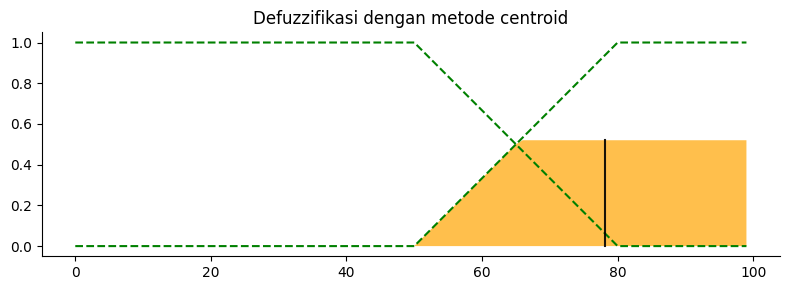

In [21]:
# Visualisasi Hasil
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle='--', label='Rendah')
ax0.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax0.fill_between(x_nk, nk0, komposisi, facecolor='Orange', alpha=0.7)
ax0.plot([nk, nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Defuzzifikasi dengan metode centroid')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()